# Are Python questions on stackoverflow dropping since ChatGPT?

This notebook  
\* fetches the number of stackoverflow questions per month with the
`Python` tag from stackoverflow using their API  
\* plots them

In [7]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.dates import date2num
from plotnine import *
from datetime import datetime, timedelta

In [3]:
# Set the API URL for fetching data
base_url = "https://api.stackexchange.com/2.3/questions"

# Set the parameters
params = {
    "site": "stackoverflow",
    "tagged": "python",
    "pagesize": 1,
    "fromdate": None,
    "todate": None,
    "filter": "total",
}

In [4]:
# Get stackoverflow data for the last 96 months
current_date = datetime.now()
end_date = current_date.replace(day=1) - timedelta(days=1)
start_date = end_date - timedelta(days=96*30)  

months = pd.date_range(start=start_date, end=end_date + pd.Timedelta(days=1), freq='MS')
data = []

# Fetch the data from the API
for i in range(len(months) - 1):
    params["fromdate"] = int(months[i].timestamp())
    params["todate"] = int(months[i+1].timestamp())
    
    response = requests.get(base_url, params=params)
    total_questions = response.json()["total"]
    
    data.append({"month": months[i].strftime("%Y-%m"), "questions": total_questions})
    
df = pd.DataFrame(data)


``` python
nov_2022_data = df[df["month"] == "2022-11"].iloc[0]
sns.set(style="white")
plt.rcParams["font.family"] = "sans-serif"
fig, ax = plt.subplots(figsize=(7, 3.5))
sns.lineplot(
    x="month", y="questions", data=df, ax=ax, linewidth=2, color="#1f77b4"
)
sns.scatterplot(
    x="month", y="questions", data=df, ax=ax, color="#1f77b4", s=20
)
ax.axvline(x=nov_2022_data["month"], ymin=0, ymax=1, linestyle="--", color="grey")
ax.annotate(
    "ChatGPT\nrelease",
    xy=(nov_2022_data["month"], nov_2022_data["questions"] + 1000),
    xytext=(5, 30),
    textcoords="offset points",
    arrowprops=dict(arrowstyle="->", color="#3B4252"),
    color="#3B4252",
)

num_labels = 5
step = len(df["month"]) // (num_labels - 1)
xticks = sorted(
    list(set(df["month"][::step].tolist() + [nov_2022_data["month"]]))[:-1]
)
ax.set_xticks(xticks)
plt.xticks(rotation=60, fontsize=12)
ax.set_ylim(5000, 30000)
ax.set_yticks(range(10000, 31000, 10000))
plt.yticks(fontsize=12)
ax.set_xlabel("Month", fontsize=14, fontweight="bold", labelpad=15)
ax.set_ylabel(
    "# of questions with python tag", fontsize=14, fontweight="bold", labelpad=15
)
ax.tick_params(axis="both", colors="grey")
for spine in ["bottom", "left"]:
    ax.spines[spine].set_color("grey")
ax.grid(False)
sns.despine()
plt.show()
```

<table style="width:67%;">
<colgroup>
<col style="width: 66%" />
</colgroup>
<tbody>
<tr>
<td style="text-align: left;"><div width="66.7%"
data-layout-align="left">
<figure id="stackoverflow">
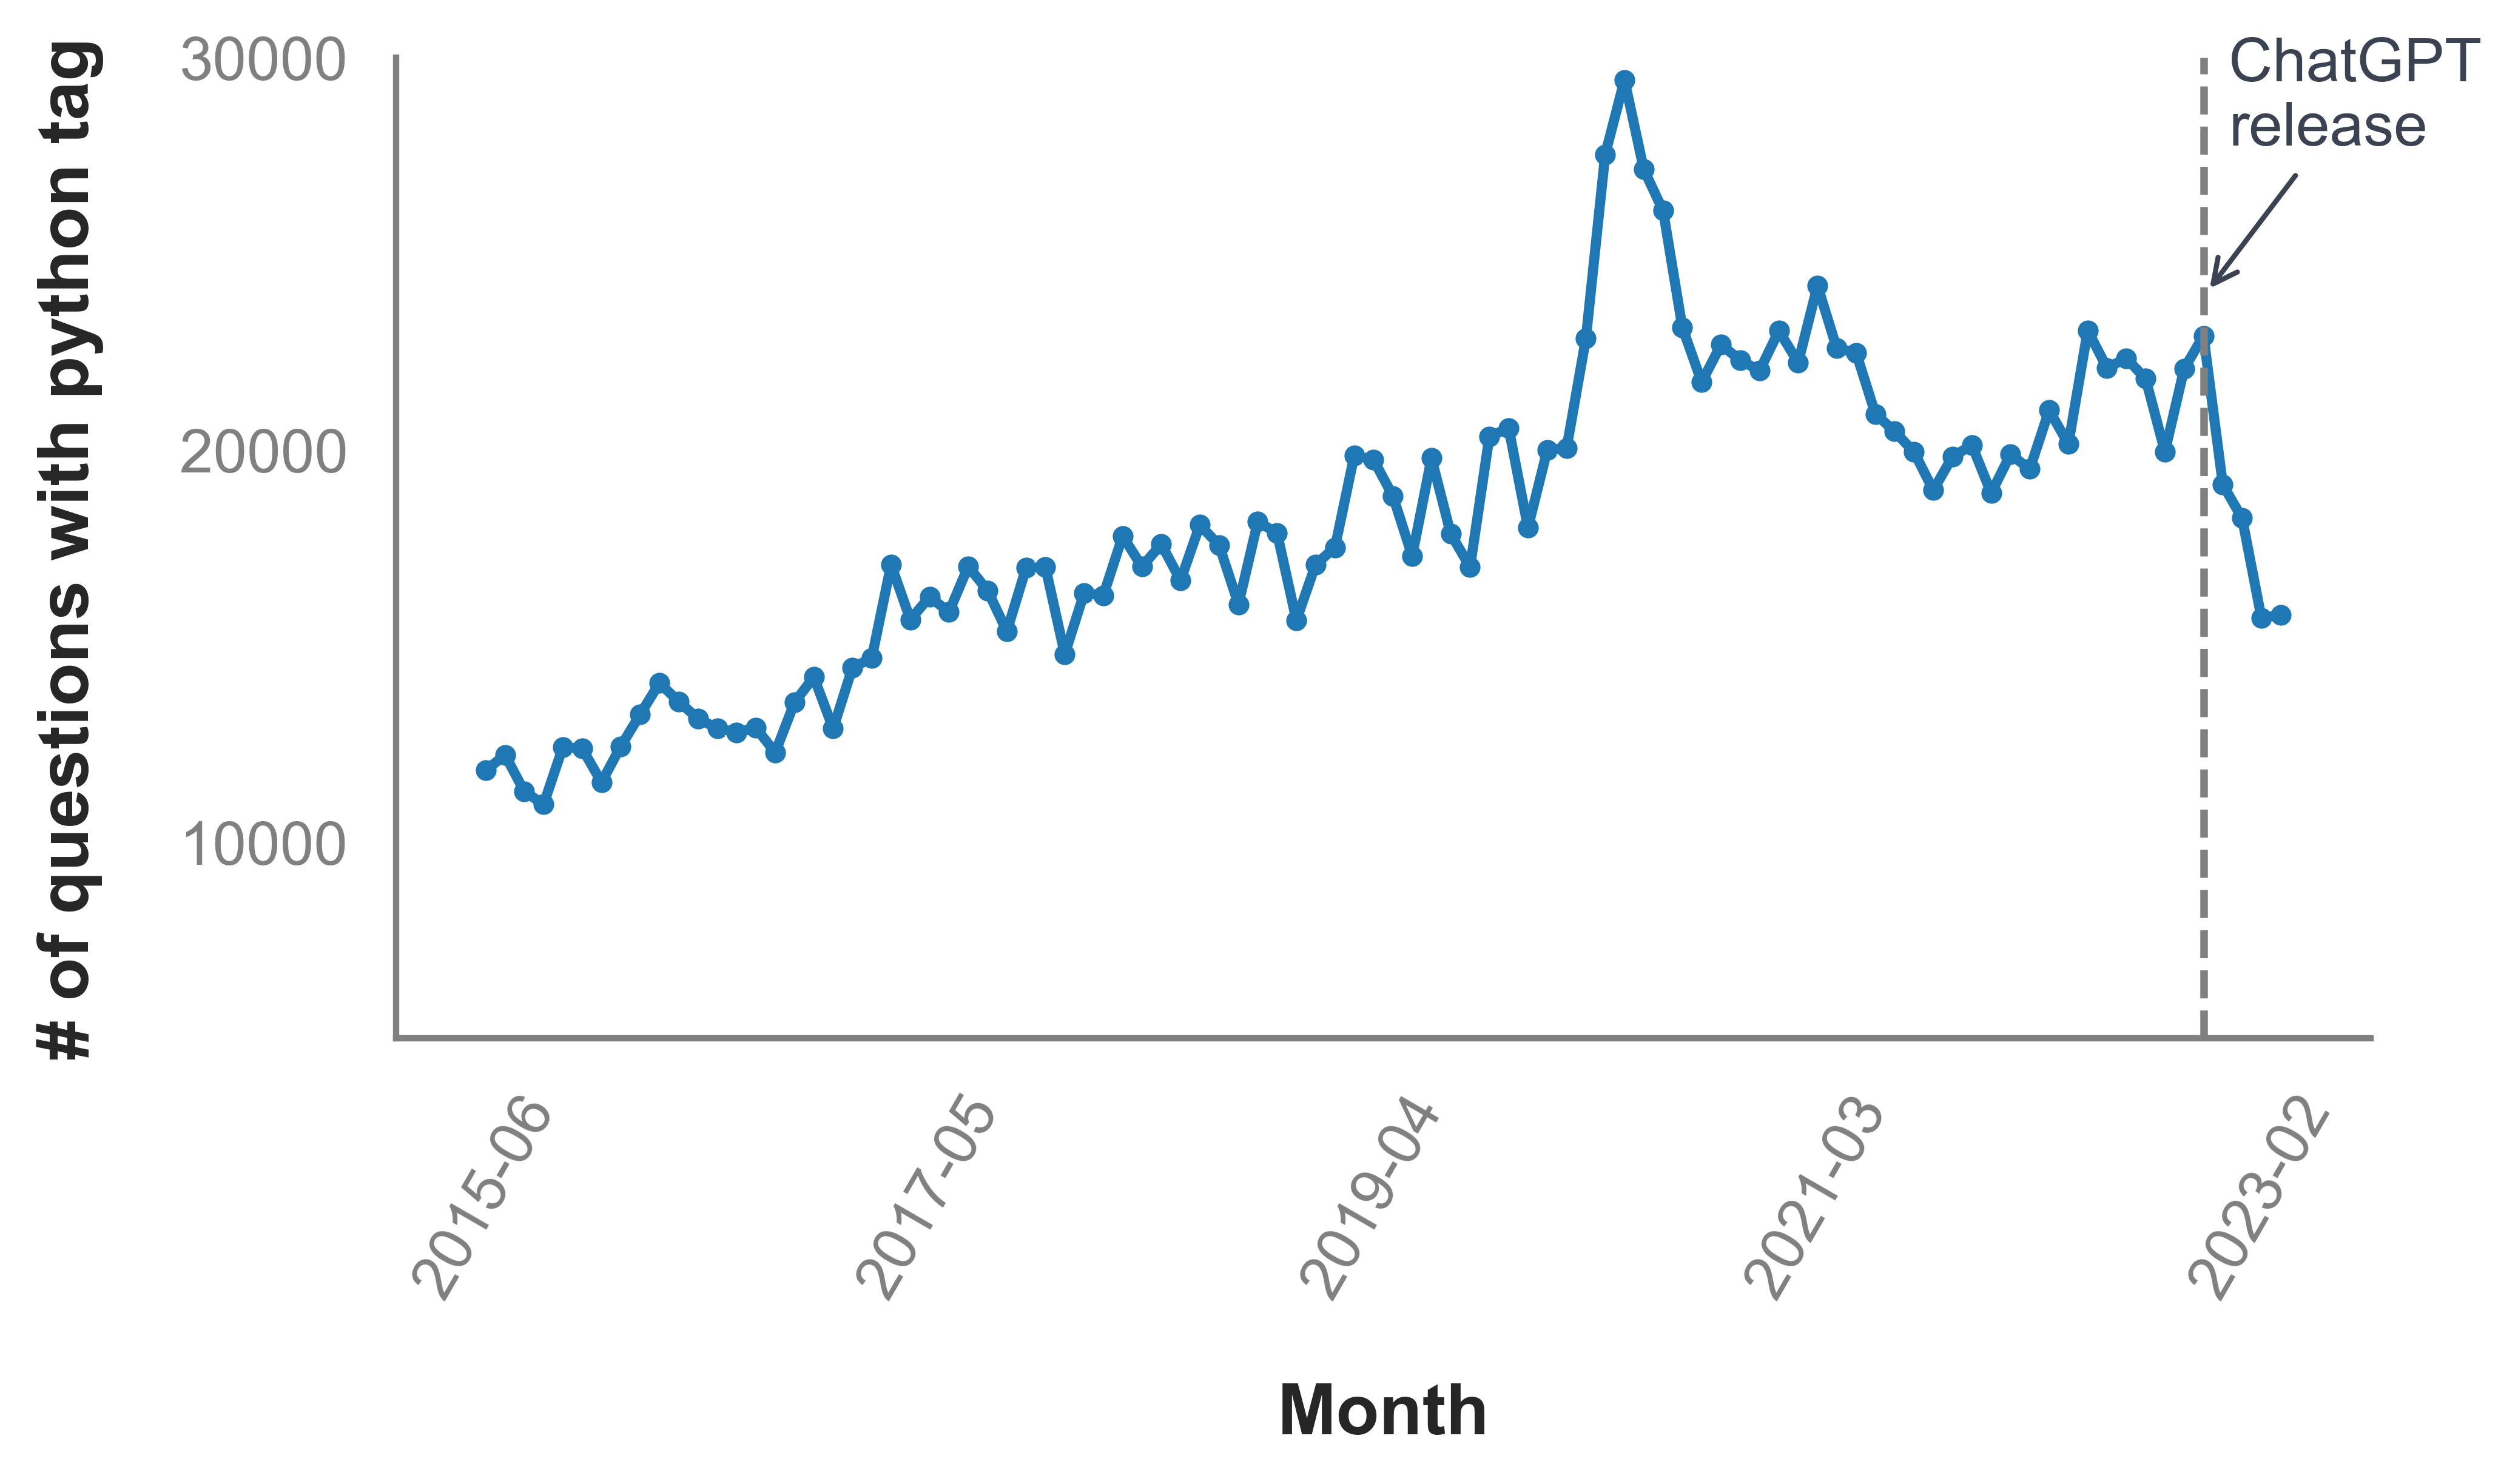
<figcaption aria-hidden="true">The number of python questions on
Stackoverflow. Data: Stackoverflow API.</figcaption>
</figure>
</div></td>
</tr>
</tbody>
</table>

In [6]:
#df.to_csv("stackoverflow_python_questions.csv", index=False)